In [51]:
import pandas as pd
df=pd.read_csv('car data.csv')

In [69]:
import seaborn as sns

In [52]:
df.shape

(301, 9)

In [53]:
df.head(8)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0


In [54]:
for i in df.columns:
    print(i,"-",len(df[i].unique()))

Car_Name - 98
Year - 16
Selling_Price - 156
Present_Price - 147
Kms_Driven - 206
Fuel_Type - 3
Seller_Type - 2
Transmission - 2
Owner - 3


In [55]:
df.isnull().mean()
print(df.columns)

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


In [60]:
#testest using car name, found no use
fd=df[[ 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [61]:
fd['Current year']=2021
fd
fd['Used years']=fd['Current year']-fd['Year'] #discrete years are less useful than discrete used years
fd.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current year,Used years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [62]:
fd.drop(['Year'],axis=1,inplace=True)
fd.drop(['Current year'],axis=1,inplace=True)

In [65]:
fd.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Used years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [66]:
fd=pd.get_dummies(fd,drop_first=True)

In [67]:
fd.head(8)

,Selling_Price,Present_Price,Kms_Driven,Owner,Used years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1
5,9.25,9.83,2071,0,3,1,0,0,1
6,6.75,8.12,18796,0,6,0,1,0,1
7,6.50,8.61,33429,0,6,1,0,0,1


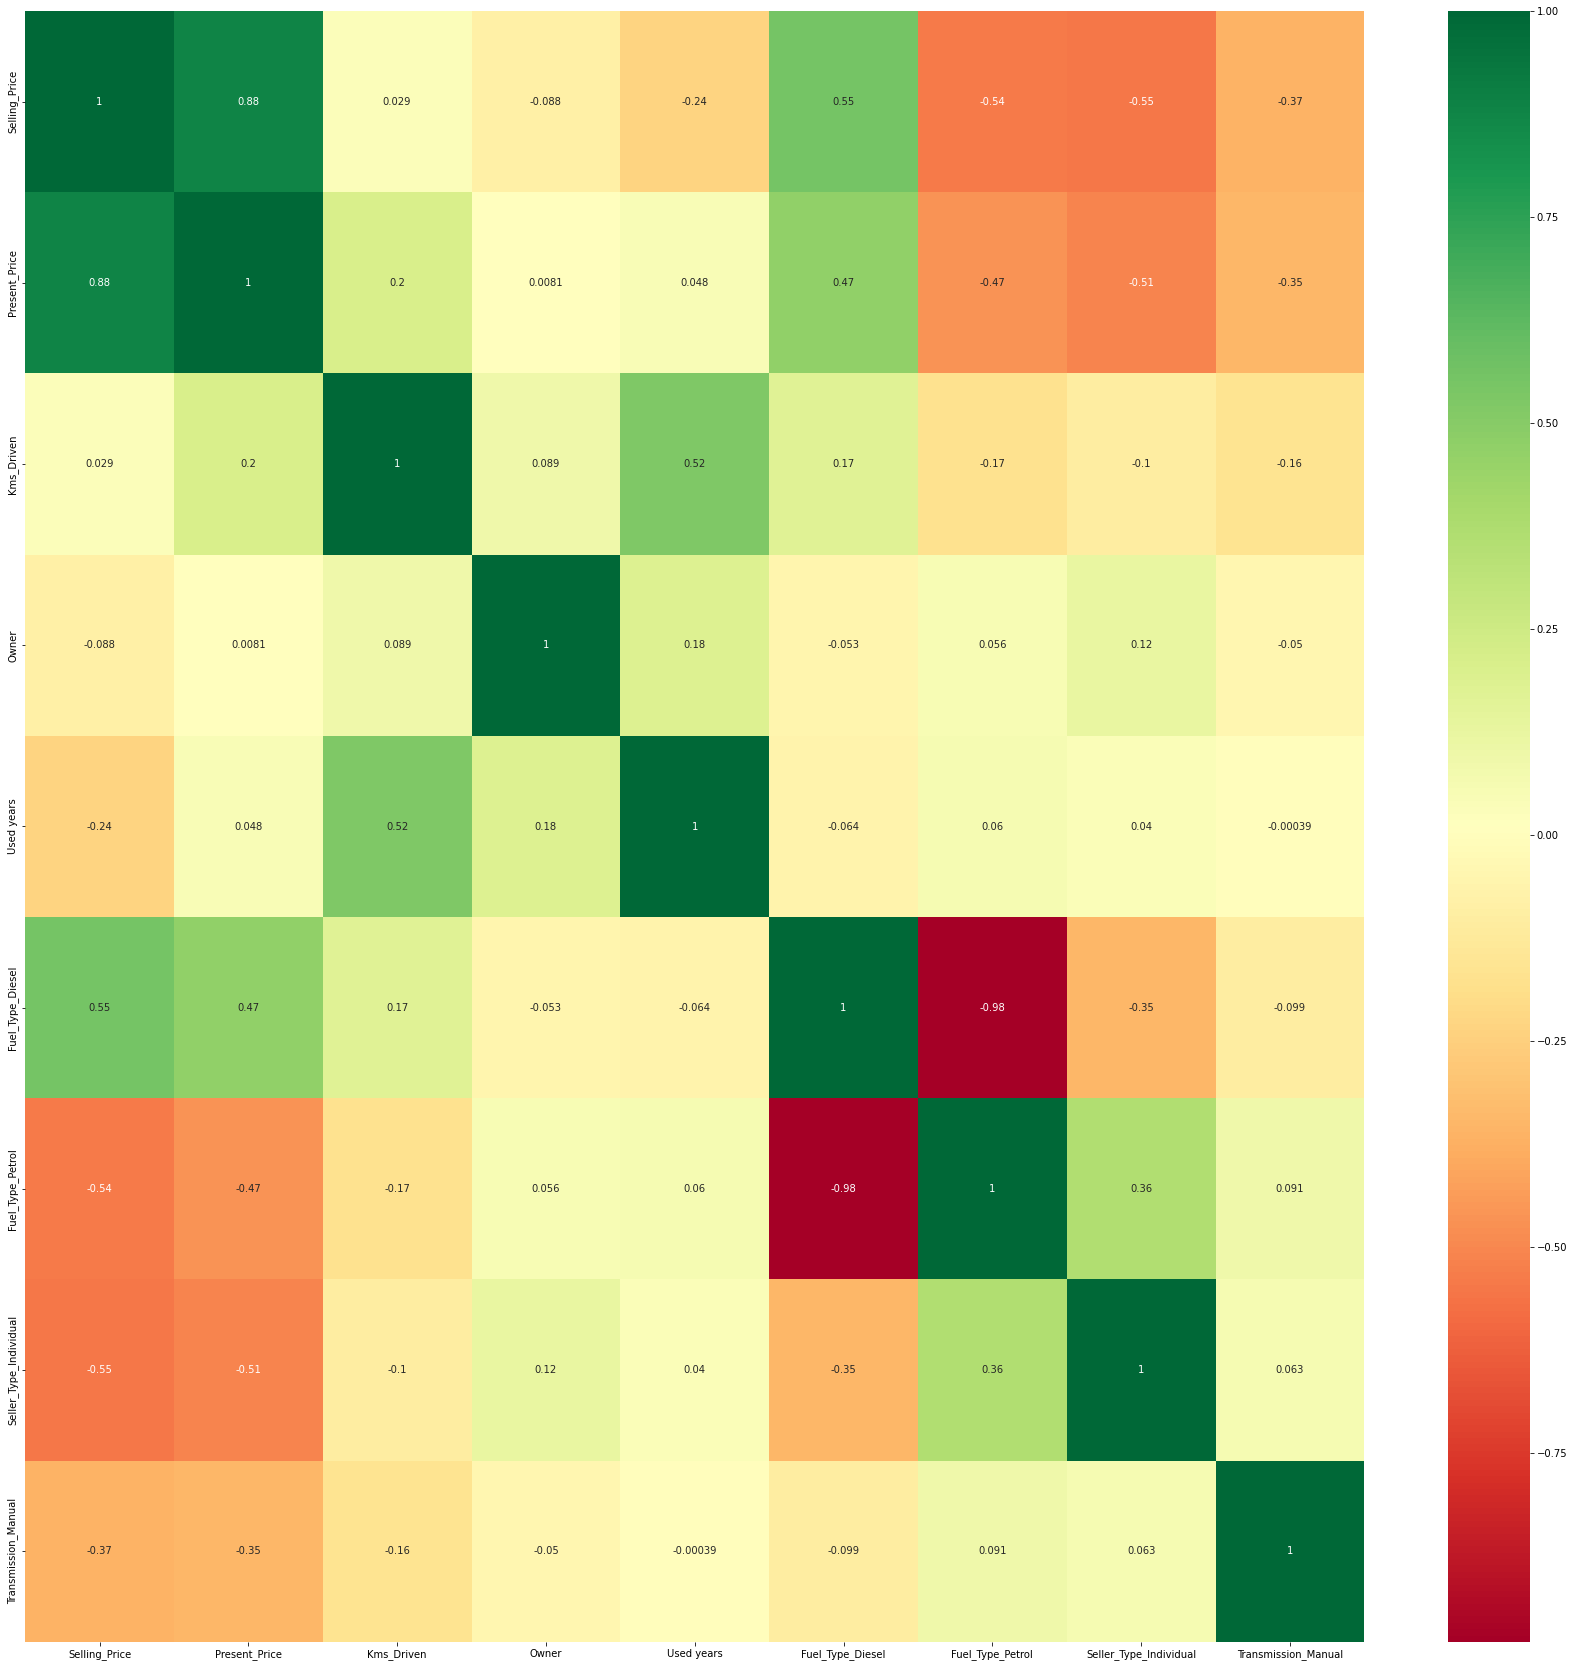

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
#heat=fd.corr()
#heat_top=heat.index
#print(heat_top)
plt.figure(figsize=(30,30))
heatmap=sns.heatmap(fd[fd.columns].corr(),annot=True,cmap="RdYlGn")

In [75]:
X=fd.iloc[:,1:]
Y=fd.iloc[:,0]

In [76]:
X.head()

,Present_Price,Kms_Driven,Owner,Used years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [77]:
#to get import important features
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [79]:
model.feature_importances_

array([0.37546397, 0.04136923, 0.00094352, 0.07562068, 0.22222113,
       0.00956153, 0.12821663, 0.1466033 ])

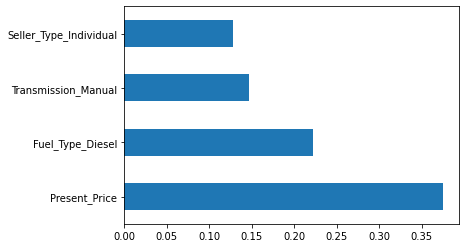

In [82]:
featimp_plot=pd.Series(model.feature_importances_,index=X.columns)
featimp_plot.nlargest(4).plot(kind='barh') #nlargest is for top n
plt.show()

In [84]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

In [85]:
xtrain.shape

(240, 8)

In [86]:

from sklearn.ensemble import RandomForestRegressor

In [88]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [99]:
#finding out best parameters
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [100]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [101]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [102]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [103]:
rf_random.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [104]:
pred=rf_random.predict(xtest)

In [105]:
pred

array([ 5.82555,  1.06652,  1.30326,  6.16159,  4.28805,  0.94248,
        4.01201,  1.19794,  1.22267,  0.6797 ,  9.4386 ,  2.6882 ,
        0.52563,  0.56649,  8.08544, 11.62017,  5.20079,  3.90103,
        7.30445,  8.81043,  7.54075,  3.81892,  6.5559 ,  1.39296,
       11.65028,  7.77931,  8.2734 ,  6.75787,  6.06768,  0.97401,
        7.53145,  1.08781, 10.94394,  0.83896,  1.41609,  2.785  ,
       20.48796,  4.86485,  6.44615,  5.19007, 22.15017,  4.00595,
        0.93449,  0.8932 ,  7.00503,  5.9652 ,  5.87477,  5.78433,
        7.52326,  9.02684,  0.78886,  1.1975 ,  3.89287,  0.41222,
        8.67103,  7.56565,  3.54199,  5.9119 ,  2.86985,  4.9832 ,
        5.51245])

C:\Users\VISERION\.conda\envs\carpp\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

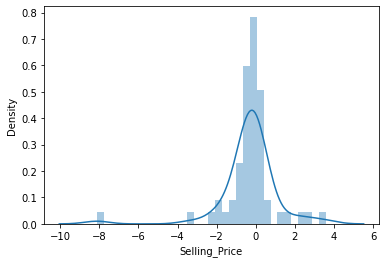

In [106]:
sns.distplot(ytest-pred)

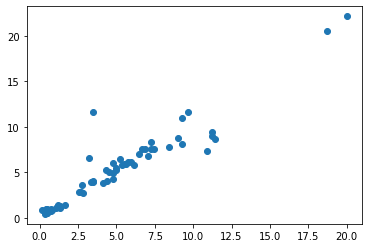

In [108]:
#to check how actually they both are behaving
plt.scatter(ytest,pred)

In [109]:
import pickle
file=open('rf_regressionmodel.pkl','wb')
pickle.dump(rf_random,file)